<a href="https://colab.research.google.com/github/tk2093/CNN/blob/main/MNIST_KERAS_programassignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
Epoch 1/10
1875/1875 [==============================] - 157s 83ms/step - loss: 1.4123 - accuracy: 0.6254
Epoch 2/10
1875/1875 [==============================] - 160s 86ms/step - loss: 0.3722 - accuracy: 0.8875
Epoch 3/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.2227 - accuracy: 0.9361
Epoch 4/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.1686 - accuracy: 0.9510
Epoch 5/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.1416 - accuracy: 0.9595
Epoch 6/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.1217 - accuracy: 0.9643
Epoch 7/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.1173 - accuracy: 0.9671
Epoch 8/10
1875/1875 [==============================] - 155s 82ms/step - loss: 0.1032 - accuracy: 0.9711
Epoch 9/10
1875/1875 [==============================] - 158s

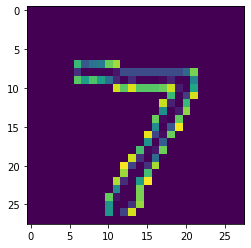

The Predicted Testing image is =7


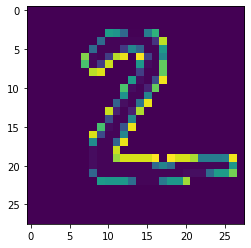

The Predicted Testing image is =2


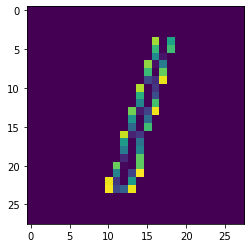

The Predicted Testing image is =1


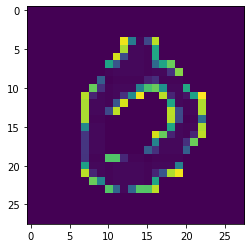

The Predicted Testing image is =0


In [1]:
#reference https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
# reference https://elitedatascience.com/keras-tutorial-deep-learning-in-python

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import numpy as np


def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt
  

  
from google.colab import drive
drive.mount('/content/drive')


#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#check image shape
print(X_train[0].shape)

#normalization values between 0 and 1
#X_train = X_train / 255
#X_test = X_test / 255

#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

#one-hot encode target column which is equal to generate_t in program 5
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]


#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) 
        # 64 are the number of filters, kernel size is the size of the filters example 3*3 here. activation used is relu.finally shape of the image
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, y_train, 
          batch_size=32, epochs=10, verbose=1) #epochs  = iterations(Nit)

# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)

print('Testing accuracy - > ',score[1] * 100)
 
ytested = model.predict(X_test)
for i in range(4):
  gen_image(X_test[i]).show() # printing image vs the predicted image below
  print("The Predicted Testing image is =%s" % (np.argmax(ytested[i])))


Epoch 1/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.8299 - accuracy: 0.7972
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2448 - accuracy: 0.9288
Epoch 3/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1843 - accuracy: 0.9467
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1584 - accuracy: 0.9540
Epoch 5/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1415 - accuracy: 0.9599
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1319 - accuracy: 0.9621
Epoch 7/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1236 - accuracy: 0.9644
Epoch 8/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1181 - accuracy: 0.9660
Epoch 9/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1106 - accuracy: 0.9684
Epoch 10/10
313/313 [==============================] - 4s 11ms/s

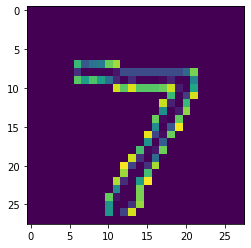

The Predicted Testing image is =7


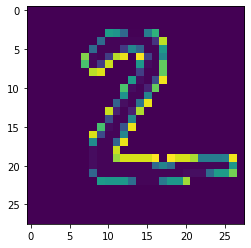

The Predicted Testing image is =2


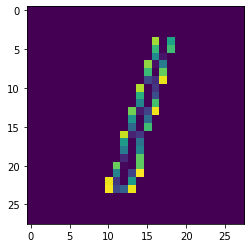

The Predicted Testing image is =1


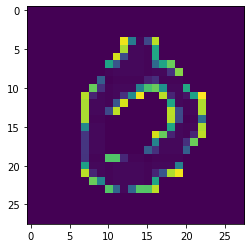

The Predicted Testing image is =0


In [2]:
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) 
        # 64 are the number of filters, kernel size is the size of the filters example 3*3 here. activation used is relu.finally shape of the image
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, y_train, 
          batch_size=32, epochs=10, verbose=1) #epochs  = iterations(Nit)

# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)

print('Testing accuracy - > ',score[1] * 100)
 
ytested = model.predict(X_test)
for i in range(4):
  gen_image(X_test[i]).show() # printing image vs the predicted image below
  print("The Predicted Testing image is =%s" % (np.argmax(ytested[i])))

Epoch 1/10
1875/1875 [==============================] - 208s 111ms/step - loss: 0.3911 - accuracy: 0.9050
Epoch 2/10
1875/1875 [==============================] - 208s 111ms/step - loss: 0.1463 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 206s 110ms/step - loss: 0.1159 - accuracy: 0.9654
Epoch 4/10
1875/1875 [==============================] - 217s 116ms/step - loss: 0.1005 - accuracy: 0.9692
Epoch 5/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0913 - accuracy: 0.9727
Epoch 6/10
1875/1875 [==============================] - 214s 114ms/step - loss: 0.0788 - accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0703 - accuracy: 0.9787
Epoch 8/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0669 - accuracy: 0.9809
Epoch 9/10
1875/1875 [==============================] - 205s 110ms/step - loss: 0.0663 - accuracy: 0.9806
Epoch 10/10
313/313 [=========================

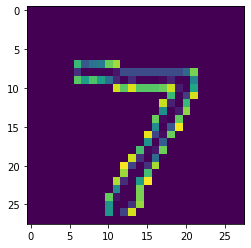

The Predicted Testing image is =7


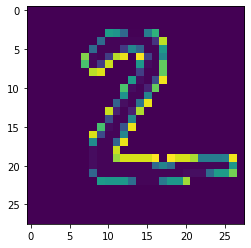

The Predicted Testing image is =2


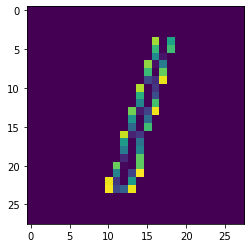

The Predicted Testing image is =1


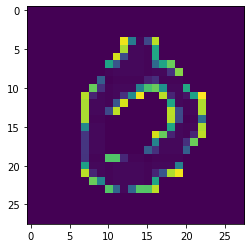

The Predicted Testing image is =0


In [3]:
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) 
        # 64 are the number of filters, kernel size is the size of the filters example 3*3 here. activation used is relu.finally shape of the image
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, y_train, 
          batch_size=32, epochs=10, verbose=1) #epochs  = iterations(Nit)

# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)

print('Testing accuracy - > ',score[1] * 100)

ytested = model.predict(X_test)
for i in range(4):
  gen_image(X_test[i]).show() # printing image vs the predicted image below
  print("The Predicted Testing image is =%s" % (np.argmax(ytested[i])))

(28, 28)
Epoch 1/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.1953 - accuracy: 0.9408
Epoch 2/10
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0835 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 204s 109ms/step - loss: 0.0635 - accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 209s 111ms/step - loss: 0.0546 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 207s 111ms/step - loss: 0.0477 - accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 207s 110ms/step - loss: 0.0387 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0367 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 205s 110ms/step - loss: 0.0338 - accuracy: 0.9892
Epoch 9/10
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0296 - accuracy: 0.9905
Epoch 10/10
313/313 [================

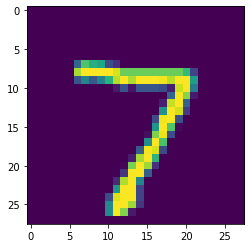

The Predicted Testing image is =7


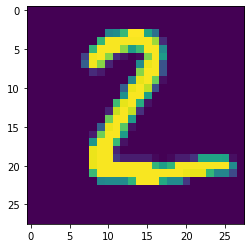

The Predicted Testing image is =2


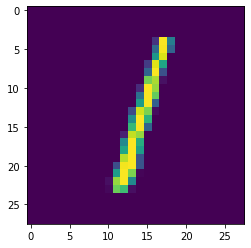

The Predicted Testing image is =1


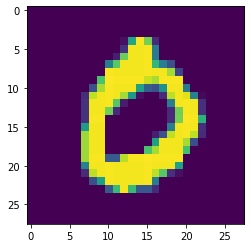

The Predicted Testing image is =0


In [4]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#check image shape
print(X_train[0].shape)

#normalization values between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

#one-hot encode target column which is equal to generate_t in program 5
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]


#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))) 
        # 64 are the number of filters, kernel size is the size of the filters example 3*3 here. activation used is relu.finally shape of the image
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
model.fit(X_train, y_train, 
          batch_size=32, epochs=10, verbose=1) #epochs  = iterations(Nit)

# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)

print('Testing accuracy - > ',score[1] * 100)
 
ytested = model.predict(X_test)
for i in range(4):
  gen_image(X_test[i]).show() # printing image vs the predicted image below
  print("The Predicted Testing image is =%s" % (np.argmax(ytested[i])))